In [21]:
from lib.class_calibrator import Calibrator
from lib.class_fits_sequence import FITSSequence
import lib.astrometry as astrometry
import lib.helpers as hlp

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder

%matplotlib inline

In [30]:
daofind = DAOStarFinder(fwhm=3.0, threshold=1000)

In [31]:
data = fits.getdata('/home/tan/Astro/pipelines/sample/solved/f_pluto.fits')

In [32]:
print(type(data))

<class 'numpy.ndarray'>


In [33]:
sources = daofind(data)

In [34]:
print(sources)

 id     xcentroid          ycentroid      ...        flux                 mag         
--- ------------------ ------------------ ... ------------------ ---------------------
  1 1338.6561548574193  11.45865839195428 ... 1.3086721864698374  -0.29207718085967127
  2   1733.16335234319  65.99321185841058 ... 2.0700989196803627    -0.789977746788295
  3 1729.8988965843641   66.0243493624239 ... 2.4876775392244044   -0.9894852125434485
  4  1725.839936985857   65.9940054483114 ... 1.5418943705739248  -0.47013655710159163
  5  4159.367833582586  69.90724380667936 ... 1.7497316520123445   -0.6074286203063637
  6 3000.2717447434434 119.86606706073965 ... 1.1854967217865349  -0.18475089344054296
...                ...                ... ...                ...                   ...
491  2632.123577628964 3385.2586359716925 ... 1.1296676960227499  -0.13237677462033667
492   114.265142595049 3409.7617202095084 ... 1.1285318473553294  -0.13128454862200756
493 113.67356680795014 3410.1232105783233 .

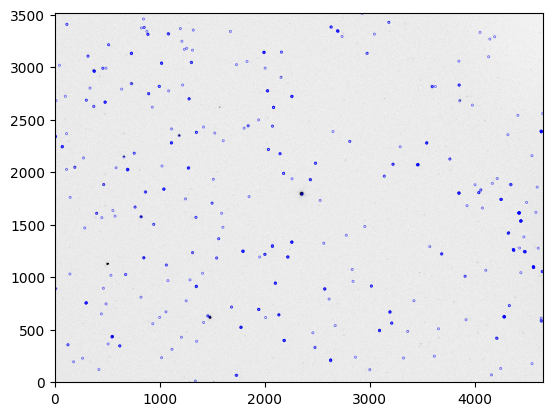

In [35]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)